In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
sample = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/sample.csv')

In [3]:
sample.shape

(5305, 2)

In [4]:
sample.head()

,id,Offer Accepted
0,0,No
1,1,No
2,2,No
3,3,No
4,4,No


In [5]:
sample['Offer Accepted'].value_counts()

No    5305
Name: Offer Accepted, dtype: int64

In [6]:
train_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
test_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

In [7]:
print('Train data shape is {} and Test data shape is {}'.format(train_data.shape, test_data.shape))

Train data shape is (12379, 31) and Test data shape is (5305, 30)


In [8]:
train_data.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype='object')

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

### Checking for the Missing Values

In [10]:
null_df = pd.DataFrame(train_data.isnull().sum(), columns = ['No. of Null Values'])
null_df['% of null values'] = (null_df['No. of Null Values']/12379)*100

In [11]:
null_df

,No. of Null Values,% of null values
offer expiration,0,0.000000
income_range,0,0.000000
no_visited_Cold drinks,198,1.599483
travelled_more_than_15mins_for_offer,0,0.000000
Restaur_spend_less_than20,121,0.977462
Marital Status,0,0.000000
restaurant type,0,0.000000
age,0,0.000000
Prefer western over chinese,0,0.000000
travelled_more_than_25mins_for_offer,0,0.000000


In [12]:
null_df_test = pd.DataFrame(test_data.isnull().sum(), columns = ['No. of Null Values'])
null_df_test['% of null values'] = (null_df_test['No. of Null Values']/5305)*100

In [13]:
null_df_test

,No. of Null Values,% of null values
offer expiration,0,0.000000
income_range,0,0.000000
no_visited_Cold drinks,90,1.696513
travelled_more_than_15mins_for_offer,0,0.000000
Restaur_spend_less_than20,61,1.149859
Marital Status,0,0.000000
restaurant type,0,0.000000
age,0,0.000000
Prefer western over chinese,0,0.000000
travelled_more_than_25mins_for_offer,0,0.000000


### Treating the columns with missing values

In [14]:
def handle_missing_data(data):
    data['no_visited_Cold drinks'].fillna(data['no_visited_Cold drinks'].mode()[0], inplace=True)
    data['Restaur_spend_less_than20'].fillna(data['Restaur_spend_less_than20'].mode()[0], inplace=True)
    data['no_visited_bars'].fillna(data['no_visited_bars'].mode()[0], inplace=True)
    data['no_Take-aways'].fillna(data['no_Take-aways'].mode()[0], inplace=True)
    data['Restaur_spend_greater_than20'].fillna(data['Restaur_spend_greater_than20'].mode()[0], inplace=True)
    
    return data

In [15]:
train_data = handle_missing_data(train_data)
test_data = handle_missing_data(test_data)

In [16]:
train_data.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                      0
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                   0
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                             0
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                               0
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [17]:
test_data.isnull().sum()

offer expiration                           0
income_range                               0
no_visited_Cold drinks                     0
travelled_more_than_15mins_for_offer       0
Restaur_spend_less_than20                  0
Marital Status                             0
restaurant type                            0
age                                        0
Prefer western over chinese                0
travelled_more_than_25mins_for_offer       0
travelled_more_than_5mins_for_offer        0
no_visited_bars                            0
gender                                     0
car                                     5262
restuarant_same_direction_house            0
Cooks regularly                            0
Customer type                              0
Qualification                              0
is foodie                                  0
no_Take-aways                              0
Job/Job Industry                           0
restuarant_opposite_direction_house        0
has Childr

#### Encoding the ordinal features

In [18]:
train_data.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype='object')

In [19]:
ord_features = ['offer expiration', 'income_range', 'no_visited_Cold drinks', 'Restaur_spend_less_than20', 'age', 'no_visited_bars',
                'Qualification','no_Take-aways','Restaur_spend_greater_than20']
nom_features = ['Marital Status', 'restaurant type', 'Customer type','Job/Job Industry', 'Climate', 'drop location']

In [20]:
def data_preprocessing(data):
    data.drop(['car','travelled_more_than_5mins_for_offer'], axis = 1, inplace = True)
    data['offer expiration'].replace(['10hours','2days'], [10,48], inplace = True)
    data['income_range'].replace(['Less than ₹12500', '₹12500 - ₹24999',
                                  '₹25000 - ₹37499','₹37500 - ₹49999', '₹50000 - ₹62499',
                                  '₹62500 - ₹74999', '₹75000 - ₹87499', '₹87500 - ₹99999', '₹100000 or More'], [0,1,2,3,4,5,6,7,8], inplace = True)
    data['no_visited_Cold drinks'].replace(['never', 'less1','1~3', '4~8', 'gt8'], [0,1,2,3,4], inplace = True)
    data['Restaur_spend_less_than20'].replace(['never', 'less1','1~3', '4~8', 'gt8'], [0,1,2,3,4], inplace = True)
    data['age'].replace(['below21','21', '26', '31', '36', '41', '46', '50plus'], [0,1,2,3,4,5,6,7], inplace = True)
    data['no_visited_bars'].replace(['never', 'less1','1~3', '4~8', 'gt8'], [0,1,2,3,4], inplace = True)
    data['gender'].replace(['Female','Male'], [0,1], inplace = True)
    data['Qualification'].replace(['Some High School','High School Graduate','Some college - no degree','Associates degree', 
                                   'Bachelors degree','Graduate degree (Masters or Doctorate)'], [0,1,2,3,4,5], inplace = True)
    data['no_Take-aways'].replace(['never', 'less1','1~3', '4~8', 'gt8'], [0,1,2,3,4], inplace = True)
    data['Restaur_spend_greater_than20'].replace(['never', 'less1','1~3', '4~8', 'gt8'], [0,1,2,3,4], inplace = True)
    
    new_data = pd.get_dummies(data, columns = nom_features)
    
    return new_data 
    

In [21]:
train_data = data_preprocessing(train_data)

In [22]:
test_data = data_preprocessing(test_data)

#### Checking whether the data is skewed towards a specific label

In [23]:
train_data['Offer Accepted'].value_counts()

Yes    6994
No     5385
Name: Offer Accepted, dtype: int64

In [24]:
train_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,no_visited_bars,gender,...,Job/Job Industry_Sales & Related,Job/Job Industry_Student,Job/Job Industry_Transportation & Material Moving,Job/Job Industry_Unemployed,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C
0,48,8,3,1,1,4,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,48,7,3,0,3,7,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,48,7,1,1,2,2,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,10,3,1,0,2,6,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,48,8,0,1,2,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1


In [25]:
test_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,no_visited_bars,gender,...,Job/Job Industry_Sales & Related,Job/Job Industry_Student,Job/Job Industry_Transportation & Material Moving,Job/Job Industry_Unemployed,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C
0,48,3,2,1,2,7,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
1,10,2,3,0,2,1,1,0,4,1,...,0,0,0,0,0,1,0,1,0,0
2,48,8,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,48,2,0,1,2,5,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,10,1,0,0,2,3,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0


In [26]:
y_train = train_data['Offer Accepted'].replace(['No', 'Yes'], [0, 1])
X_train = train_data.drop(['Offer Accepted'], axis = 1)

In [27]:
y_train.head()

0    0
1    1
2    1
3    0
4    0
Name: Offer Accepted, dtype: int64

In [28]:
X_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,no_visited_bars,gender,...,Job/Job Industry_Sales & Related,Job/Job Industry_Student,Job/Job Industry_Transportation & Material Moving,Job/Job Industry_Unemployed,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C
0,48,8,3,1,1,4,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,48,7,3,0,3,7,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,48,7,1,1,2,2,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,10,3,1,0,2,6,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,48,8,0,1,2,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1


In [29]:
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report

from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

## Random Forest Classifier

### With all the features

In [30]:
XX_train, XX_val, yy_train, yy_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2811)

In [31]:
# create pipeline with a scaler 
steps = [('scaler', RobustScaler()), ('rdf', RandomForestClassifier(n_jobs = -1, random_state = 2811))]
pipeline = Pipeline(steps)

In [32]:
# Specifying parameters for hyperparameter tuning

param_dist = {'rdf__criterion':['gini', 'entropy', 'log_loss'],
         'rdf__max_depth':range(1,40,1),
         'rdf__min_samples_split':range(1,35,1),
         'rdf__min_samples_leaf':range(1,35,1),
         'rdf__max_features':['sqrt', 'log2', None],
         'rdf__n_estimators':range(10,200,5)}

In [33]:
# do search

search = RandomizedSearchCV(pipeline, 
param_distributions=param_dist, n_iter=50)

search.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/opt/conda/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                             ('rdf',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=2811))]),
                   n_iter=50,
                   param_distributions={'rdf__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'rdf__max_depth': range(1, 40),
                                        'rdf__max_features': ['sqrt', 'log2',
                                                              None],
                                        'rdf__min_samples_leaf': range(1, 35),
                                        'rdf__min_samples_split': range(1, 35),
                                        'rdf__n_estimators': range(10, 200, 5)})

In [34]:
search.best_params_

{'rdf__n_estimators': 105,
 'rdf__min_samples_split': 13,
 'rdf__min_samples_leaf': 1,
 'rdf__max_features': 'sqrt',
 'rdf__max_depth': 21,
 'rdf__criterion': 'entropy'}

In [35]:
# create pipeline with a scaler and tuned Hyperparamters
steps = [('scaler', RobustScaler()), ('rdf', RandomForestClassifier(n_jobs = -1, n_estimators = 145, min_samples_split = 18,
                                                           min_samples_leaf = 2, max_features = None, max_depth = 21, 
                                                                    criterion = 'entropy', random_state = 2811))]
pipeline_rdf = Pipeline(steps)

In [36]:
pipeline_rdf.fit(XX_train, yy_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('rdf',
                 RandomForestClassifier(criterion='entropy', max_depth=21,
                                        max_features=None, min_samples_leaf=2,
                                        min_samples_split=18, n_estimators=145,
                                        n_jobs=-1, random_state=2811))])

In [37]:
y_hat = pipeline_rdf.predict(XX_val)

#### Evaluation Metrics

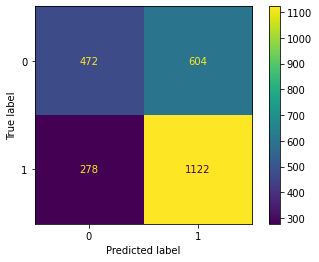

In [38]:
cm_display = ConfusionMatrixDisplay.from_predictions(yy_val ,y_hat ,values_format='.5g')

plt.show()

In [39]:
print(classification_report(yy_val ,y_hat))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      1076
           1       0.65      0.80      0.72      1400

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.62      2476
weighted avg       0.64      0.64      0.63      2476



### On test data (for submission)

In [40]:
y_pred = pipeline_rdf.predict(test_data)

In [41]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [42]:
submission = pd.DataFrame({'Offer Accepted': y_pred})

In [43]:
submission.reset_index(level=0, inplace=True)
submission.rename(columns = {'index':'id'}, inplace = True)

In [44]:
submission['Offer Accepted'].replace([0, 1], ['No', 'Yes'], inplace = True)

In [45]:
submission.head()

,id,Offer Accepted
0,0,Yes
1,1,Yes
2,2,No
3,3,No
4,4,Yes


In [46]:
submission.to_csv('submission.csv', index = False)